<a href="https://colab.research.google.com/github/vigneshramesh1/group32-capstone/blob/joseph_svm/SVM_MI_PCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.svm import LinearSVC
from sklearn.feature_selection import mutual_info_classif
from sklearn.metrics import accuracy_score

In [3]:
PATH = '/content/drive/MyDrive/SER 517/Dataset/'
Dataset = pd.read_csv(PATH + 'csv_preprocessed.csv')

In [4]:
def label_encoder(data, column_name):
  Y = data[column_name]
  label_encoder = LabelEncoder()
  y_encoded = label_encoder.fit_transform(Y)
  return y_encoded

In [5]:
Y = label_encoder(Dataset, 'Attack Type')

In [6]:
def mutual_info(X, Y):
  mutual_info_arr = mutual_info_classif(X, Y)
  series_info = pd.Series(mutual_info_arr)
  series_info.index = X.columns
  series_top = series_info.sort_values(ascending=False)[:20]
  return series_top

In [7]:
X = Dataset.drop(['Attack Type'], axis=1)

In [8]:
result = mutual_info(X, Y)

<Axes: >

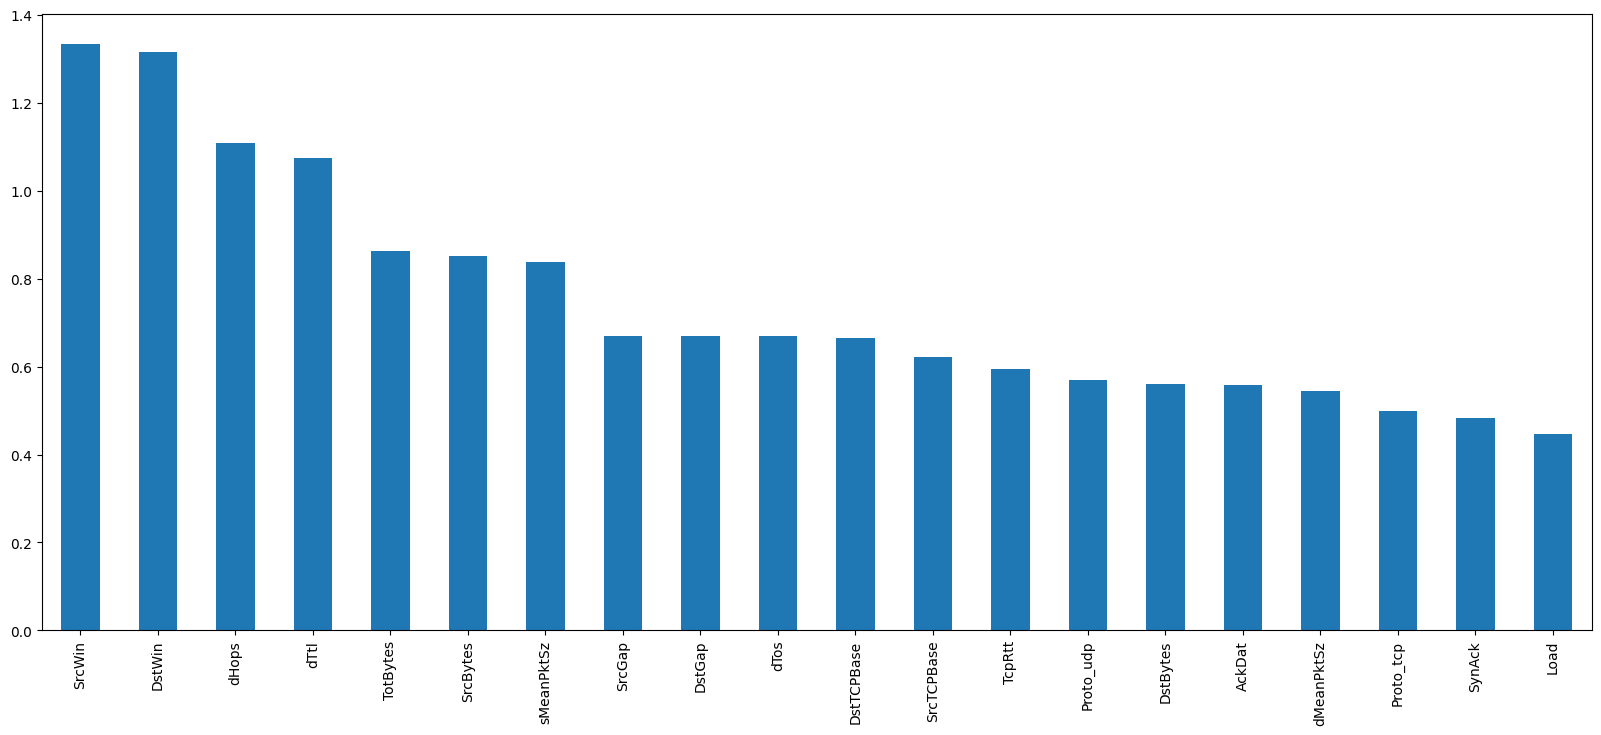

In [9]:
result.plot.bar(figsize=(20,8))

In [10]:
# X, y = Dataset.loc[:, Dataset.columns != 'Attack Type'], Dataset['Attack Type']

In [11]:
# print("X size:", X.shape)
# print("y size:", y.shape)

In [12]:
# result = mutual_info(X, y)

In [13]:
# result.plot.bar(figsize=(20,8))

In [14]:
new_data = Dataset[result.keys()]

In [15]:
def get_pca_df(scaled_data, no_of_components):
  from sklearn.decomposition import PCA
  pca = PCA(n_components=no_of_components)
  Principal_components=pca.fit_transform(scaled_data)
  column_names = ["PC "+str(i) for i in range(1, no_of_components+1)]
  pca_df = pd.DataFrame(data = Principal_components, columns = column_names)
  return pca_df

In [16]:
pca_data = get_pca_df(new_data, 15)

In [17]:
def concat_column_for_plot(pca_data, column_name):
  for_plot = pd.concat([pca_data, Dataset[column_name]], axis = 1)
  return for_plot


In [18]:
pca_with_label = concat_column_for_plot(pca_data, "Attack Type")

In [19]:
pca_with_label

,PC 1,PC 2,PC 3,PC 4,PC 5,PC 6,PC 7,PC 8,PC 9,PC 10,PC 11,PC 12,PC 13,PC 14,PC 15,Attack Type
0,-0.599182,0.462261,-0.178510,0.272502,-0.028478,0.067217,-0.068166,-0.027939,0.024265,0.009180,0.059706,-0.018591,-0.416755,0.090632,0.148051,0
1,-0.599182,0.462261,-0.178510,0.272502,-0.028478,0.067217,-0.068166,-0.027939,0.024265,0.009180,0.059706,-0.018591,-0.416755,0.090632,0.148051,0
2,9.478483,10.855641,-2.439643,2.666757,-1.766086,-2.289885,0.462532,0.029634,0.084309,-0.305425,-0.040005,0.074350,0.025404,0.633979,0.221944,0
3,8.918090,10.227624,-2.296876,2.518293,-1.728745,-2.321483,0.480103,0.035191,0.087627,-0.303528,-0.051849,0.054270,0.044012,0.242229,-0.095297,0
4,10.531499,12.092213,-2.731819,3.044660,-2.006025,-2.577484,0.530224,0.043578,0.086115,-0.344149,-0.052266,0.104886,0.230278,0.963071,0.303236,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1215670,-0.414444,3.568163,22.409178,2.579465,-2.202246,-2.882162,0.497575,-0.012427,0.014685,-0.403524,-0.043775,-0.329598,-1.684996,1.308132,2.411052,0
1215671,1.957180,1.341912,12.759788,-0.695127,-0.260507,-0.926825,0.276072,-0.014606,-0.012202,-0.123326,-0.184424,-0.302651,-0.316837,-3.189097,-5.455731,0
1215672,1.559409,-1.105497,3.101690,-1.836120,-0.914642,-0.497823,0.453940,0.147276,-0.209396,-0.118210,0.052453,-0.179084,4.382887,-1.386698,-1.645515,0
1215673,0.415235,1.771989,12.466048,0.473332,-0.718766,-0.995520,0.323047,0.074198,-0.065688,-0.122717,-0.180733,0.000719,1.662854,-0.735449,-5.712096,0


In [20]:
X = pca_with_label.iloc[:, :-1]  # All rows, all columns except the last one as features
y = pca_with_label['Attack Type']  # Target variable

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [22]:
# Initialize and train the SVC model
svc_model = SVC(kernel='rbf', random_state=42)  # You can choose different kernels like 'rbf', 'poly', etc.
svc_model.fit(X_train, y_train)

SVC(random_state=42)

In [23]:
# Predictions
y_pred = svc_model.predict(X_test)

In [24]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

Accuracy: 0.9855745634118721


In [25]:
# Compute and print the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(conf_matrix)

Confusion Matrix:
[[143320      1      0      0      0      0      0      0      0]
 [     8  40517      0      0      0   2023      2      0      0]
 [     0      0    379      0      0      0      0      0      0]
 [     0      0      0   2460    419      0      0      0      0]
 [     0      0      9      8   5919      0      0      0      0]
 [     0   2690      0      0     37  19006     35      0      0]
 [     0      0      5      0      8      0   6091      0      0]
 [     0      0      0      0      0      0      0 136986      0]
 [     0      0      2      0     14      0      0      0   4764]]


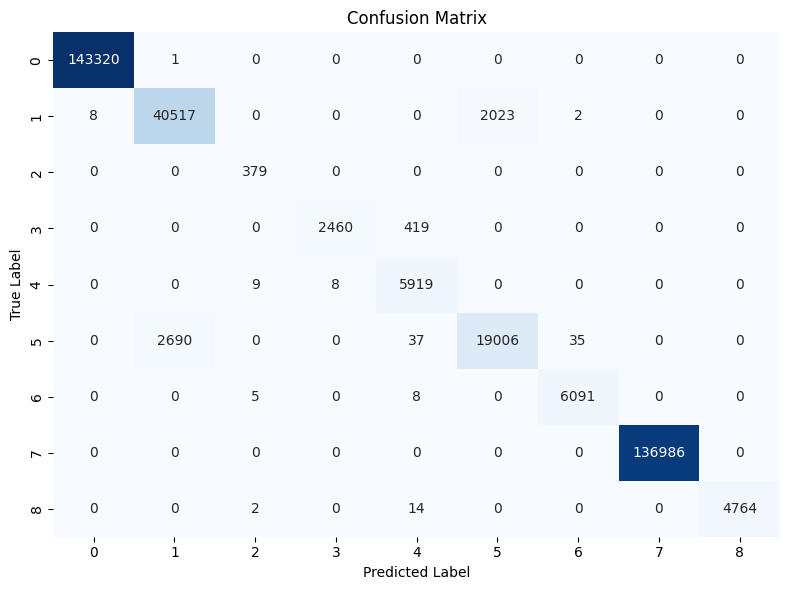

In [26]:
# Visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

# Adjust layout to make room for the title
plt.tight_layout()

# Show plot
plt.show()